In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, grad, config
import jaxquantum as jqt
import jaxquantum.devices as jqtd
import jax.numpy as jnp
from tqdm import tqdm
import matplotlib.pyplot as plt

config.update("jax_enable_x64", True)

/opt/miniconda3/envs/jax-framework/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(196.34722222222223, 0.5, 'Energy/$E_J$')

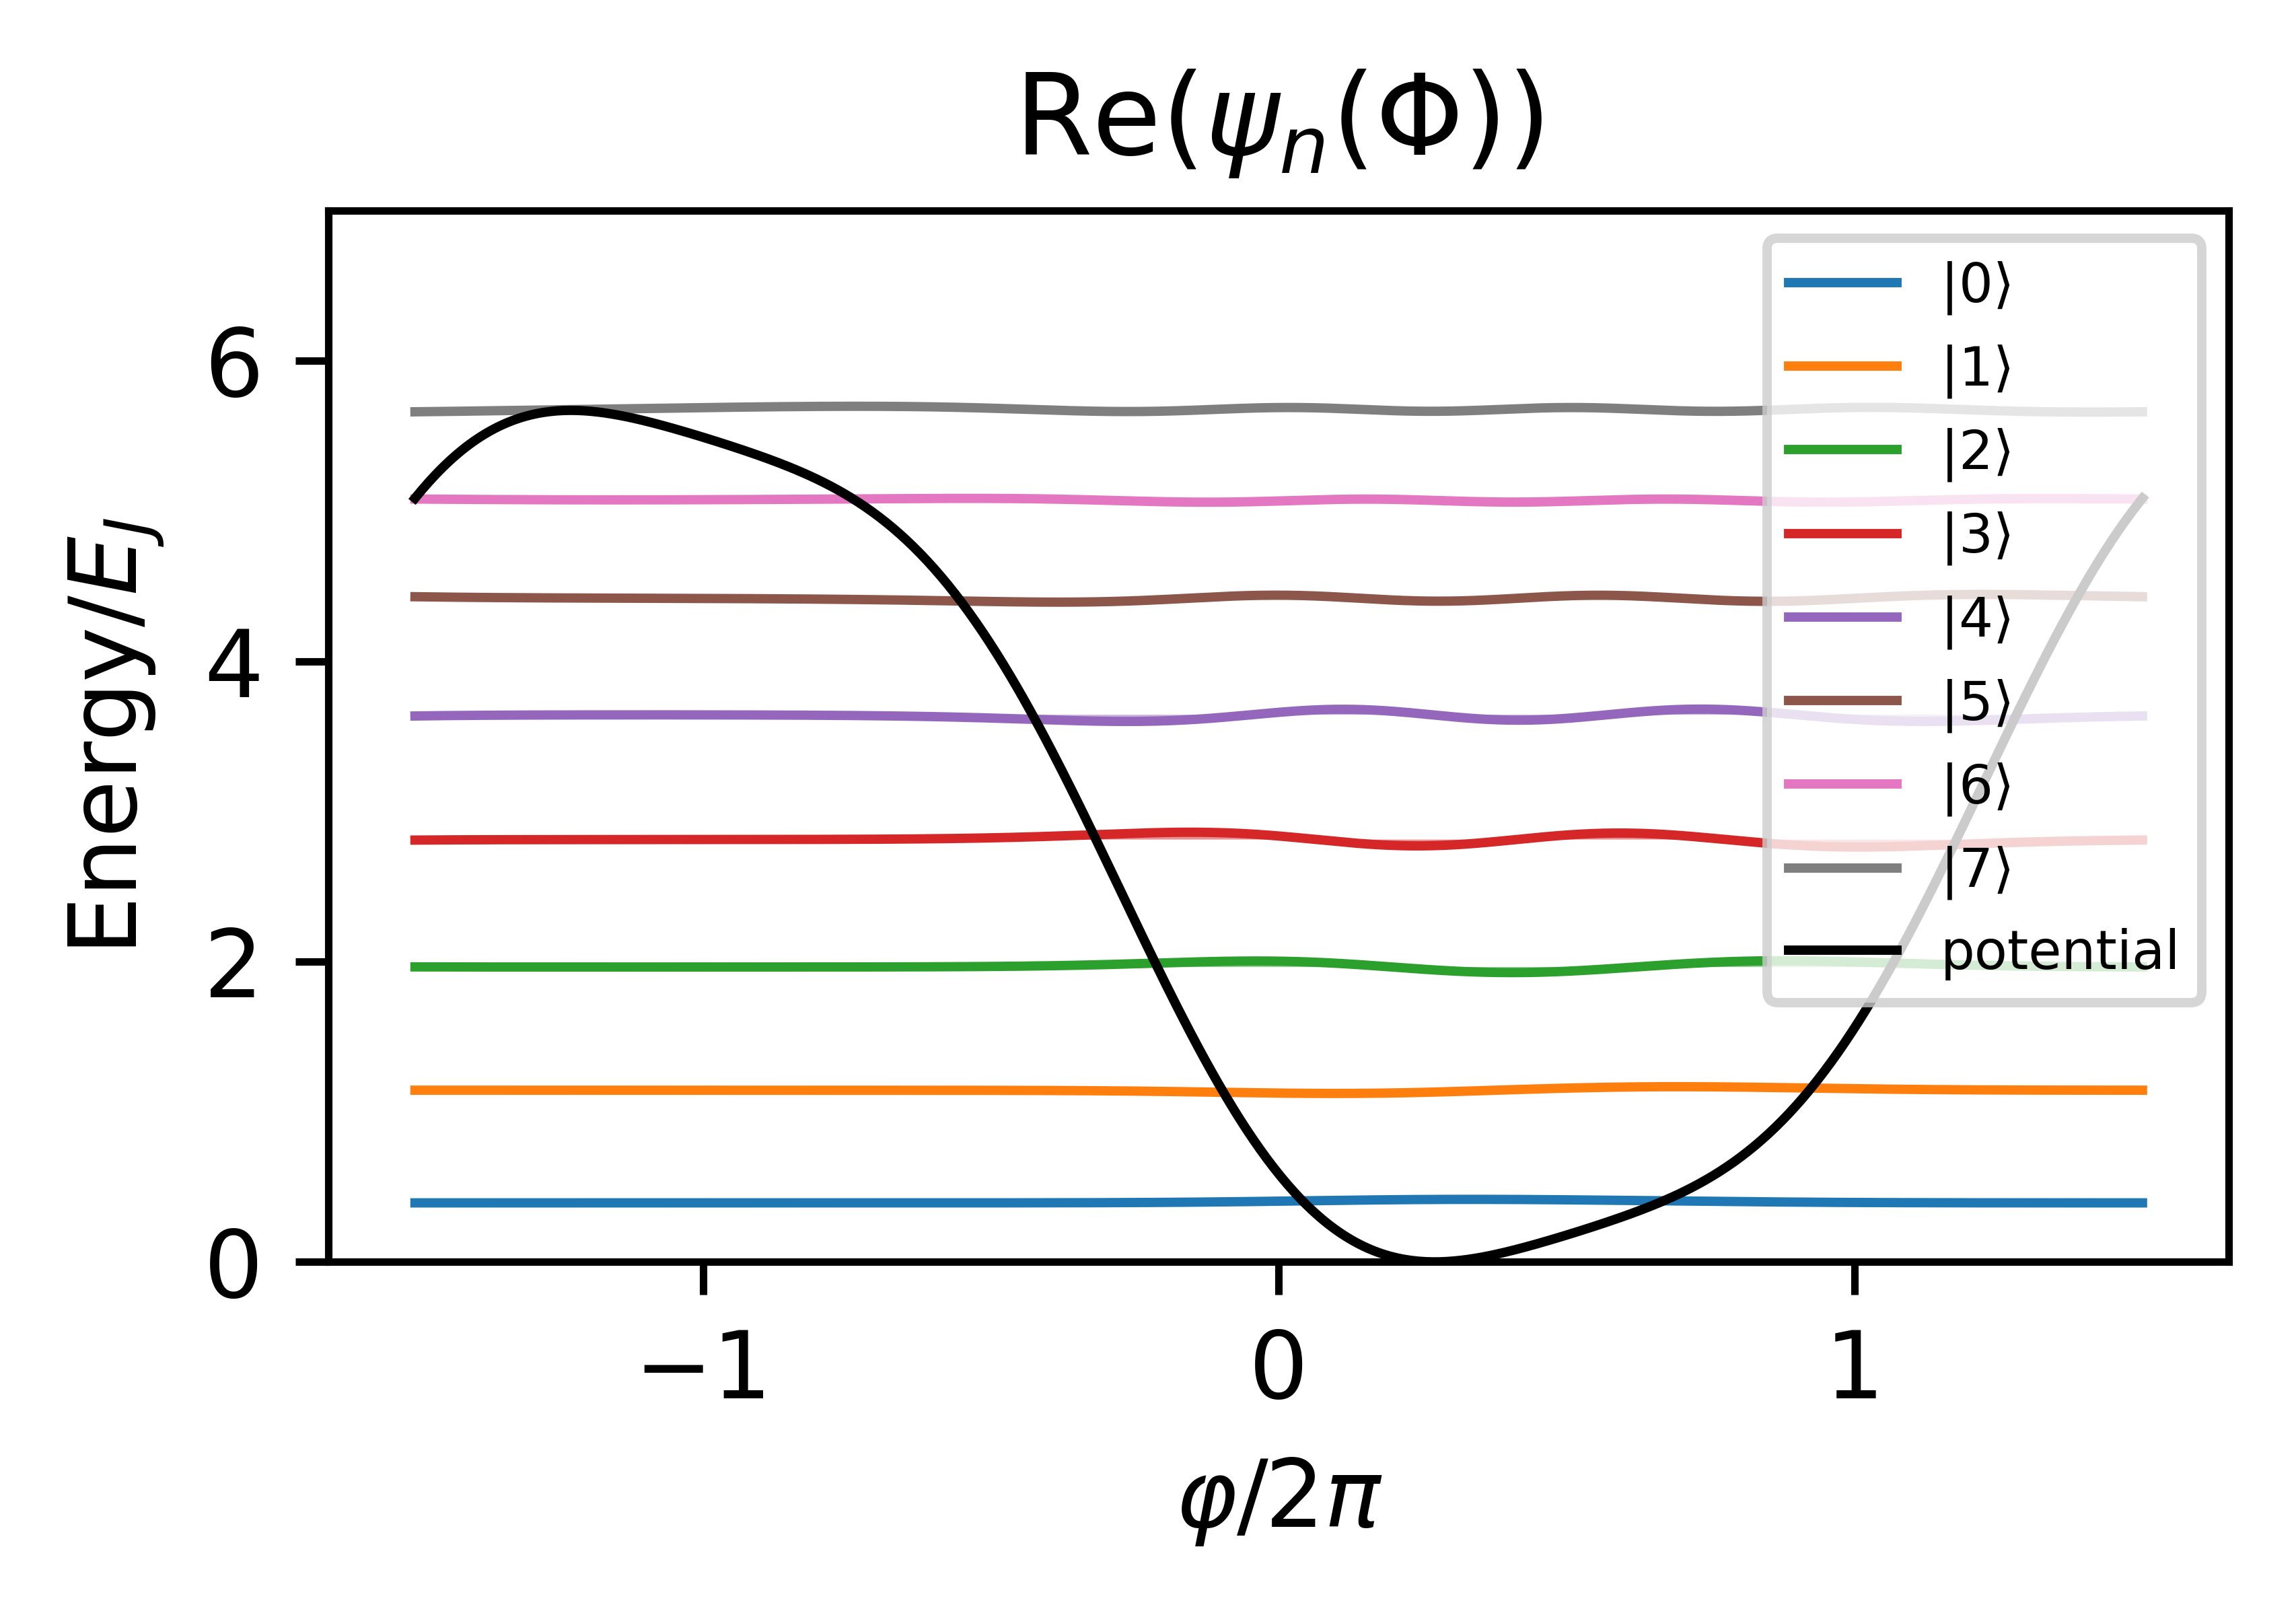

In [6]:
Ec_q = 5
Ej_q = 15
m = 3
N = 10

snail = jqtd.SNAIL.create(
    2*m*N+1,
    {"Ec": Ec_q, "Ej": Ej_q, "m": m, "alpha": 0.29, "phi_ext": 0.41},
    N_pre_diag=2*m*N+1,
    basis=jqtd.BasisTypes.charge,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

Ej = snail.params["Ej"]
phi_vals = jnp.linspace(-0.5*m,0.5*m,500)
axs = snail.plot_wavefunctions(phi_vals, max_n = 8, mode="real", y_scale_factor=1/Ej, zero_potential=True, ylim=[0,7])
axs.set_ylabel(r"Energy/$E_J$")